In [1]:
import pandas as pd
import numpy as np
import urllib
from bs4 import BeautifulSoup
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [48]:
# https://www.indeed.com/jobs?q=data+scientist+$20,000&l=New+York&start=30
# $20000 means 20k or up
# l = location
# start increases incrementally by 10. Starting at 00.

Trialing one page of Indeed to test if my functions work.

In [49]:
# Test one page of url
url = 'https://www.indeed.com/jobs?q=data+scientist&start=00'
html = urllib.urlopen(url).read()
soup = BeautifulSoup(html, 'lxml')

In [50]:
rows = soup.find_all('span', {'class':'np'})
if len(rows) > 1:
    print 'pass'
elif 'Next' in rows[0].text:
    print 'break'
else:
    print 'what'

break


In [51]:
rows[0].text

u'Next\xa0\xbb'

### Function making
Defining all my functions for each feature

In [52]:
# Trying to get all jobs titles first
job_list = []
for row in soup.find_all('div', {'id':True, 'data-jk':True}):
    jobtitle = row.a.text
    print jobtitle
    job_list.append(jobtitle)
    
# Convert to function
def job_func(soup, job_list=[]):
    for row in soup.find_all('div', {'id':True, 'data-jk':True}):
        jobtitle = row.a.text
        job_list.append(jobtitle)
    return job_list

Data Scientist
Data Scientist
Junior Data Scientist
Jr Data Scientist
Data Scientist
Data Scientist/Machine Learning Engineer
Data Scientist
Data Scientist
Data Science Analyst
Data Scientist
Data Scientist
Entry Level Data Scientist
Data Scientist (Product)
Data Scientist - Interactive Gaming
Data Scientist - Machine Learning


In [53]:
# Looking at location
location_list = []
for row in soup.find_all('div', {'id':True}):
    for header in row.find_all('span', {'class':'location'}):
        location = header.text
        print location
        location_list.append(location)
        
# Convert to function
def loc_func(soup, location_list=[]):
    for row in soup.find_all('div', {'id':True}):
        for header in row.find_all('span', {'class':'location'}):
            location = header.text
            location_list.append(location)
    return location_list

Durham, NC
Arlington, VA 22209
Tempe, AZ 85282
Chantilly, VA 20151
Kennesaw, GA
San Diego, CA 92129
Seattle, WA 98103 (Green Lake - Wallingford area)
Newark, DE
Silver Spring, MD 20910
Chicago, IL
Kansas City, MO
United States
New York, NY 10011 (Chelsea area)
San Francisco, CA
Palo Alto, CA


In [54]:
# Looking at salary if there is one
salary_list = []
for row in soup.find_all('div', {'id':True}):
    for block in row.find_all('td', {'class':'snip'}):
        try:
            salary =  block.find('span', {'class':'no-wrap'}).text
            print salary
            salary_list.append(salary)
        except:
            print 'no salary info'
            salary_list.append(np.nan)
            
def sal_func(soup, salary_list=[]):
    for row in soup.find_all('div', {'id':True}):
        for block in row.find_all('td', {'class':'snip'}):
            try:
                salary =  block.find('span', {'class':'no-wrap'}).text
                salary_list.append(salary)
            except:
                salary_list.append(np.nan)
                
    return salary_list

no salary info
no salary info
no salary info
no salary info
no salary info
no salary info
no salary info
$125,000 a year
no salary info
$110,000 - $125,000 a year
no salary info
no salary info
no salary info
no salary info
no salary info


In [55]:
# Looking at company
company_list = []
for row in soup.find_all('div', {'id':True}):
    for header in row.find_all('span', {'class':'company'}):
        company_list.append(header.text.replace('\n',''))

def comp_func(soup, company_list=[]):
    for row in soup.find_all('div', {'id':True}):
        for header in row.find_all('span', {'class':'company'}):
            company_list.append(header.text.replace('\n',''))
    return company_list

In [56]:
# Looking at days posted/sponsored. Will specify sponsored as np.nan
# Time is organized by: hours, days, and more than 30 days. 30+ days will be regarded as 30 days
time_list = []
for row in soup.find_all('div', {'id':True}):
    for header in row.find_all('div', {'class':'result-link-bar'}):
        try:
            time =  header.find('span', {'class':'date'}).text
            print time
            if 'days' in time:
                days = float(time.split()[0])
                time_list.append(round(days,2))
            elif 'hours' in time:
                hours = float(time.split()[0])/24.
                time_list.append(round(hours,2))
            else:
                time_list.append(30.0)
        except:
            print 'Sponsored'
            time_list.append(np.nan)
            
def time_func(soup, time_list=[]):
    for row in soup.find_all('div', {'id':True}):
        for header in row.find_all('div', {'class':'result-link-bar'}):
            try:
                time =  header.find('span', {'class':'date'}).text
                if 'days' in time:
                    days = float(time.split()[0])
                    time_list.append(days)
                elif 'hours' in time:
                    hours = float(time.split()[0])/24.
                    time_list.append(hours)
                else:
                    time_list.append(30.0)
            except:
                time_list.append(np.nan)
                
    return time_list

Sponsored
Sponsored
Sponsored
1 day ago
3 days ago
1 day ago
2 days ago
2 days ago
9 hours ago
1 day ago
5 days ago
1 day ago
1 day ago
Sponsored
Sponsored


In [58]:
# Get summary of job posting
summary_list = []
for row in soup.find_all('div', {'id':True}):
    for header in row.find_all('span', {'class':'summary'}):
        summary_list.append(header.text.replace('\n',''))

def sum_func(soup, summary_list=[]):
    for row in soup.find_all('div', {'id':True}):
        for header in row.find_all('span', {'class':'summary'}):
            summary_list.append(header.text.replace('\n',''))
    return summary_list

In [59]:
# Ratings and number of reviews
rating_list = []
for row in soup.find_all('div', {'id':True, 'data-jk':True}):
    try:
        # Get number of reviews
        ratings = row.find('span', {'class':'slNoUnderline'}).text
        
        # Get actual star count out of 5
        # width is a string with format 'width:##.#px'. Trying to pull out ##.# as a float
        width = row.find('span', {'style':True})['style']
        pixels = re.search('\d{2}.\d',width)
        stars = round(float(pixels.group())/60. * 5, 2)
        rating_list.append((stars, ratings))
        
    except:
        rating_list.append((np.nan, np.nan))

def rat_func(soup, rating_list=[], star_list=[], review_list=[]):
    for row in soup.find_all('div', {'id':True, 'data-jk':True}):
        try:
            # Get number of reviews
            ratings = row.find('span', {'class':'slNoUnderline'}).text

            # Get actual star count out of 5
            # width is a string with format 'width:##.#px'. Trying to pull out ##.# as a float
            width = row.find('span', {'style':True})['style']
            pixels = re.search('\d{2}.\d',width)
            stars = round(float(pixels.group())/60. * 5, 2)
            rating_list.append((stars, ratings))

        except:
            rating_list.append((np.nan, np.nan))
            
    star_list = [i[0] for i in rating_list]
    review_list = [i[1] for i in rating_list]
            
    return star_list, review_list

In [61]:
# Got some information, but df is not clean at all. Let's work easiest to hardest. 
# Reviews is first

def cleaner(row):
    try:
        # Replace commas with nothing
        new_row = row.replace(',', '')

        # Get of rid of word 'reviews'
        new_row = float(new_row.split()[0])
    except:
        new_row = np.nan    
    
    return new_row

In [62]:
# Make a cleaner for salary. Taking average of range of salary for computation purposes
def sal_cleaner(row):
    try:
        # Replace commas with nothing
        new_row = row.replace(',', '')

        # Get list of salary split by '-'
        split_list = new_row.split('a year')[0]
        dol_replace = split_list.replace('$', '')
        dol_split = dol_replace.split('-')
        
        if len(dol_split) > 1:
            new_row = 0.5 * (float(dol_split[0]) + float(dol_split[1]))
        else:
            new_row = float(dol_split[0])
    except:
        new_row = np.nan    
    
    return new_row

In [63]:
# We are going to eventually run this above code multiple times. So better to put in a function
def indeed_maker(soup):
    df = pd.DataFrame(zip(job_func(soup), 
                      loc_func(soup), 
                      sal_func(soup), 
                      comp_func(soup), 
                      time_func(soup), 
                      rat_func(soup)[0], 
                      rat_func(soup)[1],
                      sum_func(soup)), 
                  columns=['Title', 
                           'Location', 
                           'Salary',
                           'Company', 
                           'Post_date', 
                           'Rating', 
                           'Reviews',
                           'Summary'])
    
    df.Reviews = df.Reviews.map(cleaner)
    df.Salary = df.Salary.map(sal_cleaner)
    
    return df

### Time to run. Tried to run a while loop, but Indeed cuts off at page 100.
Even if there are more than 100 page worths, Indeed cuts off.
As a result, will have to search through several cities instead of searching without locations.

In [64]:
list_of_cities = ['Atlanta', 'Los+Angeles', 'Seattle', 'Portland', 'San+Francisco', 
                  'Washington%2C+DC', 'Boston', 'Austin', 'Dallas', 'Houston',
                  'Orlando', 'Philadelphia', 'Pittsburgh', 'Cincinnati', 'Miami',
                  'New+York+City', 'New+Jersey', 'Kansas+City', 'San Diego',
                 'San+Jose', 'Salt+Lake+City', 'Raleigh', 'Minneapolis', 'Oklahoma+City',
                 'St.+Louis', 'Detroit', 'Colombus', 'Cleveland', 'Indianapolis', 'Baltimore']

In [65]:
# Looking for two titles
for role in ['data+scientist', 'data+analyst']:
    # Looking at a list of cities
    for city in list_of_cities:
        # Looking through all pages Indeed will allow you to look through
        for page in np.linspace(0, 950, 20):
            # Page indicator
            start = str(int(page))

            # Web initializer
            url = 'https://www.indeed.com/jobs?q=' + role + '&l=' + city + '&limit=50&start=' + start
            html = urllib.urlopen(url).read()
            soup = BeautifulSoup(html, 'lxml')

            # Function that scrapes all relevant data and creates a dataframe        
            ind_df = indeed_maker(soup)
            
            # More pythonic to break for loop if no next link is available. Could not figure out a way quick enough.

In [66]:
# Getting rid of row duplicates (sometimes reviews and rating will be different)
ind_df.drop_duplicates(subset=['Summary'], inplace=True)
ind_df.describe()

,Salary,Post_date,Rating,Reviews
count,1871.000000,20417.000000,29441.000000,29441.000000
mean,86023.212453,13.945187,3.904609,1591.476648
std,38038.561864,9.074210,0.497423,5608.328746
min,10000.000000,0.083333,1.250000,2.000000
25%,59889.750000,5.000000,3.550000,27.000000
50%,77500.000000,12.000000,3.700000,156.000000
75%,102500.000000,22.000000,4.350000,768.000000
max,275000.000000,30.000000,5.000000,98543.000000


In [69]:
# Saving dataframe as a csv so that I don't have to run code again.
ind_df.to_csv('Indeed_0619', encoding='utf-8')

# Organize all csv files from several days into one and drop duplicates

Scraped data from several days in hopes of capturing 1000 salaries.
Because csv files were saved, will have to pull from multiple files, concat dataframes, drop duplicates, and finally reset index to get a fresh dataframe to work with.

In [99]:
def read_and_clean(filepath):
    df = pd.read_csv(filepath)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    return df

empty_df_list = []
paths = ['Indeed_0612', 'Indeed_0615', 'Indeed_0617', 'Indeed_0618', 'Indeed_analyst_0615']
for filepath in paths:
    empty_df_list.append(read_and_clean(filepath))

df = pd.concat(empty_df_list)

In [100]:
df.head()

,Title,Location,Salary,Company,Post_date,Rating,Reviews,Summary
0,Data Scientist,"Arlington, VA 22209",NaN,Deloitte,NaN,4.25,4610.0,Gathering data from both information systems a...
1,Data Scientist,"Durham, NC",NaN,xometry,NaN,NaN,NaN,Xometry is seeking a data scientist to build t...
2,Data Scientist,"Harrisburg, PA",NaN,Pennsylvania Higher Education Assistance A...,NaN,3.35,201.0,Scrubbing data if required. Assist in text ana...
3,Data Scientist with PHD,"Atlanta, GA",NaN,Norfolk Southern,0.125,NaN,NaN,Work experience with large-scale data:. As a D...
4,Data Scientist,United States,87500.0,RDM,10.000,4.35,14.0,"A deep understanding of algorithms, mathematic..."


In [101]:
# Cleaning step. Drop duplicates & reset index. 

df.drop_duplicates(['Summary'], inplace=True)
df.reset_index(drop=True, inplace=True)

### Now to perform some EDA.
Will get a general feel for the dataframe and perform any data cleaning that is deemed necessary.

In [102]:
# In the end, I get 1000+ salaries. These may not all be "data scientist/analyst" positions. But it is a good start.

df.describe()

,Salary,Post_date,Rating,Reviews
count,1744.000000,20138.000000,27378.000000,27378.000000
mean,86023.891628,13.990815,3.909612,1689.057747
std,38183.969354,9.961603,0.481977,5415.637299
min,10000.000000,0.083333,1.500000,2.000000
25%,60000.000000,5.000000,3.600000,24.000000
50%,77500.000000,13.000000,3.700000,140.000000
75%,102500.000000,23.000000,4.350000,768.000000
max,275000.000000,30.000000,5.000000,98543.000000


In [103]:
data = df[df.Salary.notnull()]

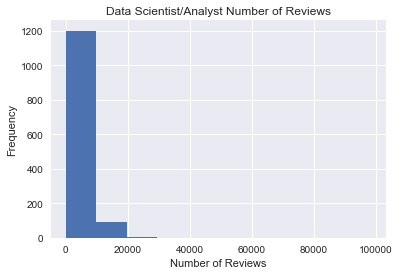

In [104]:
data.Reviews.plot(kind='hist')
plt.title('Data Scientist/Analyst Number of Reviews')
plt.xlabel('Number of Reviews')
plt.show()

In [105]:
# Seems like code was implemented or written incorrectly. Will have to drop any rows with reviews > 40000
# Also realized that when script cannot find reviews #, that means there are 0 reviews, NOT np.nan
data.Reviews = data.Reviews.map(lambda x: 0 if np.isnan(x) else x)
data = data[data.Reviews < 40000]
data.reset_index(drop=True, inplace=True)

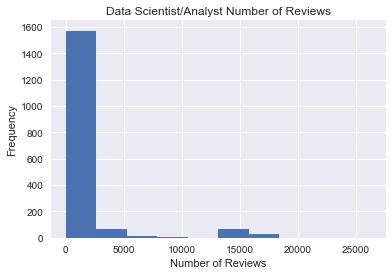

In [106]:
data.Reviews.plot(kind='hist')
plt.title('Data Scientist/Analyst Number of Reviews')
plt.xlabel('Number of Reviews')
plt.show()

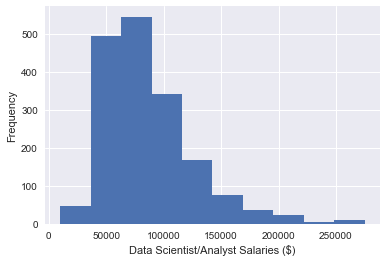

In [107]:
data.Salary.plot(kind='hist')
plt.xlabel('Data Scientist/Analyst Salaries ($)')
plt.show()

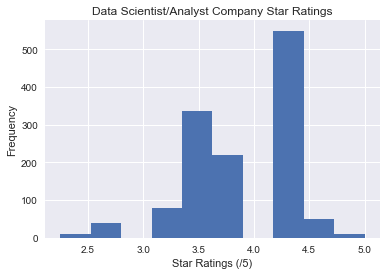

In [108]:
data.Rating.plot(kind='hist')
plt.title('Data Scientist/Analyst Company Star Ratings')
plt.xlabel('Star Ratings (/5)')
plt.show()

In [109]:
data.describe()

,Salary,Post_date,Rating,Reviews
count,1743.000000,1145.000000,1297.000000,1743.000000
mean,86035.953528,13.730240,3.886353,1255.317843
std,38191.603976,9.685828,0.491728,3575.848606
min,10000.000000,0.083333,2.250000,0.000000
25%,60000.000000,6.000000,3.550000,0.000000
50%,77500.000000,13.000000,3.700000,46.000000
75%,102500.000000,22.000000,4.350000,367.000000
max,275000.000000,30.000000,5.000000,26252.000000


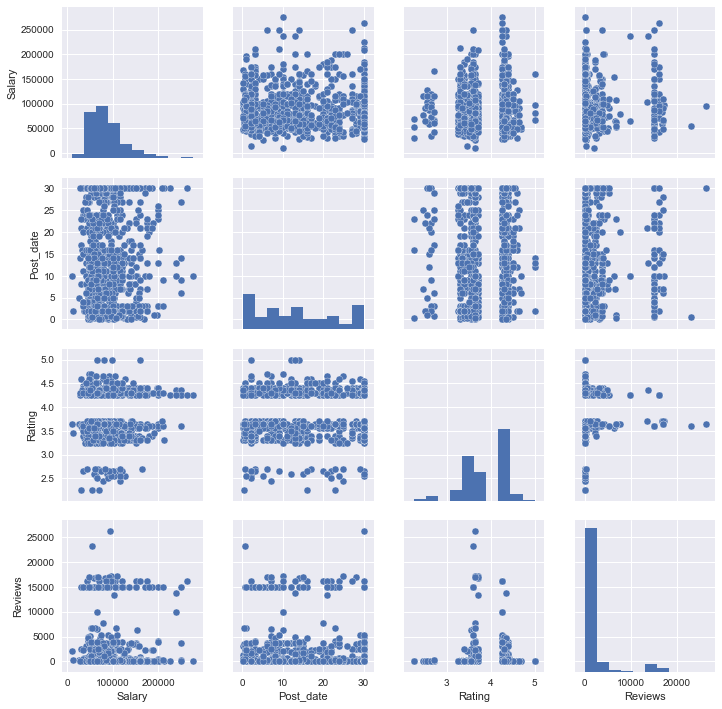

In [115]:
# Pair plot of the numerical data
sns.pairplot(data.dropna())
plt.show()

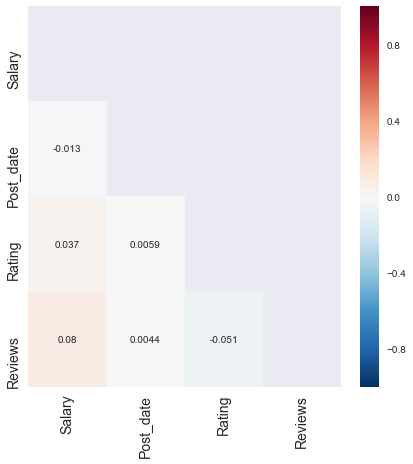

In [116]:
# Set init variables
corr = data[['Salary', 'Post_date', 'Rating', 'Reviews']].corr()

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(7,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, annot=True, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation='vertical')
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

### Questions that need to be answered

1. Determine the industry factors that are most important in predicting the salary amounts for these data. Will be running a classification on whether lower than median ($77.5k) or equal to or higher. Factors include:
    * NLP on summary
    * star rating
    * number of reviews
    * posting date
    * NLP on location
    * NLP on title
2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

In [385]:
# Import libraries
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [216]:
data['High_salary'] = data.Salary.map(lambda x: 0 if x < 77500.0 else 1)

In [219]:
data.High_salary.mean()

0.50143430866322436

In [320]:
# Run a stemmer on Title
snow = SnowballStemmer('english')

placeholder = pd.Series('Title_token')

placeholder.Title_token = data.Title.apply(lambda x: x.decode('utf-8').split(" "))
data['Title_stem'] = placeholder.Title_token.apply(lambda x: " ".join([snow.stem(y) for y in x]))

In [265]:
# First we will split data into a train/test split.
X = data.Title_stem
y = data.High_salary
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=90)

In [221]:
# Do a count vectorizer first
cvec = CountVectorizer(ngram_range=(1,3))
X_train_cv = cvec.fit_transform(X_train)

In [224]:
# Run an SVM model to compare
sv = SVC()
sv.fit(X_train_cv, y_train)
print np.mean(cross_val_score(sv, X_train_cv, y_train, cv=5))
print sv.score(cvec.transform(X_test), y_test)

0.500716845878
0.489971346705


In [290]:
# Going to try several vectorizers and models. Better to write a function that will do this in one step.
def tokenize_test(text, vect, model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    X = data[text]
    y=data.High_salary
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=90)
    X_train_dtm = vect.fit_transform(X_train)
    
    X_test_dtm = vect.transform(X_test)
    model.fit(X_train_dtm, y_train)
    y_pred_class = model.predict(X_test_dtm)
    print 'Accuracy: ', accuracy_score(y_test, y_pred_class)

In [294]:
model_list = [sv, LogisticRegression(), BernoulliNB()]

for i in model_list:
    tokenize_test('Title_stem', cvec, i)
    print

Accuracy:  0.656160458453

Accuracy:  0.776504297994

Accuracy:  0.744985673352



In [295]:
# Try Hashing & TfidVectorizer
hvec = HashingVectorizer(ngram_range=(1,4))
tvec = TfidfVectorizer(ngram_range=(1,4))

for i in model_list:
    tokenize_test('Title_stem', hvec, i)
    print

for i in model_list:
    tokenize_test('Title_stem', tvec, i)
    print

Accuracy:  0.699140401146

Accuracy:  0.76217765043

Accuracy:  0.74212034384

Accuracy:  0.587392550143

Accuracy:  0.78223495702

Accuracy:  0.733524355301



In [342]:
for vect in [cvec, hvec, tvec]:
    for i in [sv, LogisticRegression(), BernoulliNB()]:
        tokenize_test('Summary', vect, i)
        print

Accuracy:  0.63323782235

Accuracy:  0.713467048711

Accuracy:  0.724928366762

Accuracy:  0.56446991404

Accuracy:  0.710601719198

Accuracy:  0.69340974212

Accuracy:  0.613180515759

Accuracy:  0.722063037249

Accuracy:  0.724928366762



In [297]:
for vect in [cvec, hvec, tvec]:
    for i in [sv, LogisticRegression(), BernoulliNB()]:
        tokenize_test('Location', vect, i)
        print

Accuracy:  0.54441260745

Accuracy:  0.650429799427

Accuracy:  0.650429799427

Accuracy:  0.656160458453

Accuracy:  0.656160458453

Accuracy:  0.624641833811

Accuracy:  0.664756446991

Accuracy:  0.644699140401

Accuracy:  0.65329512894



In [298]:
for vect in [cvec, hvec, tvec]:
    for i in [sv, LogisticRegression(), BernoulliNB()]:
        tokenize_test('Location', vect, i)
        print

Accuracy:  0.54441260745

Accuracy:  0.650429799427

Accuracy:  0.650429799427

Accuracy:  0.656160458453

Accuracy:  0.656160458453

Accuracy:  0.624641833811

Accuracy:  0.664756446991

Accuracy:  0.644699140401

Accuracy:  0.65329512894



In [374]:
tokenize_test('Location', cvec, RandomForestClassifier())
tokenize_test('Location', tvec, RandomForestClassifier())

Accuracy:  0.638968481375
Accuracy:  0.644699140401


In [336]:
# Feature Extractions based on Titles and summaries (if possible)
data['Scientist'] = data.Title.map(lambda x: 1 if 'scientist' in x.lower() else 0)
data['Analyst'] = data.Title.map(lambda x: 1 if 'analyst' in x.lower() else 0)
data['Senior'] = data.Title.map(lambda x: 1 if 'senior' in x.lower() else 1 if 'sr.' in x.lower() else 0)
data['Entry'] = data.Title.map(lambda x: 1 if 'entry' in x.lower() else 1 if 'junior' in x.lower() else 1 if 'jr.' in x.lower() else 0)
data['Manager'] = data.Title.map(lambda x: 1 if 'manager' in x.lower() else 1 if 'mgr' in x.lower() else 0)

In [367]:
# Perform countvectorizer on Summary to get the most common words
stop = stopwords.words('english')
stop.extend(['data', 'scientist', 'scientists', 'analyst', 'analysis', 'ability', 'analyze', 'analyzing', 
             'analysts', 'analytics', 'using', 'tools', 'work', 'working', 'including', 'information', 
             'position', 'company', 'knowledge', 'provide', 'quality', 'related', 'reports', 'reporting',
            'science', 'skills', 'services', 'strong'])

cv = CountVectorizer(ngram_range=(1,3), stop_words=stop, max_features=50)

count_df  = pd.DataFrame(cv.fit_transform(data.Summary).todense(),
                   columns=cv.get_feature_names())

In [369]:
# The top non-filler words are:
top_words = ['financial', 'health', 'machine learning', 'sql']
# Machine is related to machine learning (although the pair didn't always come together), and years is related to
# years of experience.

data['Financial'] = data.Summary.map(lambda x: 1 if 'financial' in x.lower() else 0)
data['Health'] = data.Summary.map(lambda x: 1 if 'health' in x.lower() else 0)
data['Machine_learning'] = data.Summary.map(lambda x: 1 if 'machine' in x.lower() else 1 if 'machine learning' in x.lower() else 1 if 'machine-learning' in x.lower() else 0)
data['SQL'] = data.Summary.map(lambda x: 1 if 'sql' in x.lower() else 0)

In [386]:
# Perform PCA on all these binaries
import patsy
y, X = patsy.dmatrices("High_salary ~ Financial + Health + Machine_learning + SQL + Scientist + Analyst + Senior + Entry + Manager -1", data)

ss = StandardScaler()
X_ss = ss.fit_transform(X)

binaries_pca = PCA()
binaries_pca.fit(X_ss)
binaries_pca.components_

array([[-0.21431581,  0.05817039,  0.44661421, -0.0314818 ,  0.59949819,
        -0.60709258,  0.05805919, -0.11555964,  0.07446606],
       [-0.32356498,  0.4218444 , -0.29760395, -0.38647471, -0.18007136,
        -0.17425518, -0.27814386, -0.01572636,  0.58225451],
       [-0.40214281, -0.05081843,  0.03360592,  0.25086277,  0.07739177,
         0.02746583, -0.61566521,  0.56883411, -0.24955443],
       [-0.17829906, -0.57172581,  0.00543702,  0.5035806 , -0.14282233,
        -0.06169947,  0.01606255, -0.09890882,  0.59453349],
       [ 0.3592401 , -0.53388683,  0.12286371, -0.60433771,  0.03099573,
        -0.09141237, -0.146807  ,  0.38164081,  0.17050772],
       [ 0.15053973,  0.32280088,  0.06676818,  0.21988923, -0.04118597,
        -0.07934087,  0.50524741,  0.70192467,  0.25369997],
       [ 0.7047023 ,  0.26133844,  0.02401025,  0.33332478,  0.11051615,
        -0.12067919, -0.50092767, -0.09401188,  0.19201804],
       [-0.07203387,  0.17380373,  0.82941689, -0.07625073, -0

In [391]:
trans_binaries = binaries_pca.transform(X)

In [401]:
lr = LogisticRegression()
lr.fit(trans_binaries, y)
lr.score(trans_binaries, y)

array(0.6833046471600689)